# Gridded Datasets

In the [previous guide](3-Tabular_Datasets.ipynb) we discovered how to work with tabular datasets. Although tabular datasets are extremely common, many other datasets are best represented by regularly sampled n-dimensional arrays (such as images, volumetric data, or higher dimensional parameter spaces). On a 2D screen and using traditional plotting libraries, it is often difficult to visualize such parameter spaces quickly and succinctly, but HoloViews lets you quickly slice and dice such a dataset to explore the data and answer questions about it easily.

## Gridded

Gridded datasets usually represent observations of some continuous variable across multiple dimensions---a monochrome image representing luminance values across a 2D surface, volumetric 3D data, an RGB image sequence over time, or any other multi-dimensional parameter space. This type of data is particularly common in research areas that make use of spatial imaging or modeling, such as climatology, biology, and astronomy, but can also be used to represent any arbitrary data that vary over multiple dimensions.

In HoloViews terminology the dimensions the data vary over are the so called key dimensions (**kdims**), which define the coordinates of the underlying array. The actual value arrays are described by the value dimensions (**vdims**). High-level data libraries like ``xarray`` or ``iris`` allow you to store the coordinates with the array, but here we will declare the coordinate arrays ourselves so we can get a better understanding of how the gridded data interfaces work. We will therefore start by loading a very simple 3D array:

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
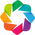

In [2]:
import numpy as np

import holoviews as hv
from holoviews import opts

hv.extension('bokeh', 'matplotlib')

In [7]:
# Load the two-photon calcium imaging dataset
data = np.load('../assets/twophoton.npz')
calcium_array = data['Calcium']
print('Calcium array shape:', calcium_array.shape)
#show the first 5 rows and columns of the first time frame, reshaped for better readability
calcium_array[:5, :5, :1].reshape(5, 5)

Calcium array shape: (62, 111, 50)


array([[ 386,  223,  279,  541,  756],
       [ 476,  439,  546,  887, 1019],
       [ 786,  700,  691,  654,  996],
       [ 986,  643,  682,  364,  816],
       [ 912,  732,  782,  856,  774]], dtype=uint16)

In [20]:
xy = calcium_array[:, :, :1].reshape(62, 111)  # reshape to 2D array with time and
xy

array([[ 386,  223,  279, ...,  884,  755,  508],
       [ 476,  439,  546, ...,  626,  457,  772],
       [ 786,  700,  691, ...,  836,  745,  681],
       ...,
       [ 868,  650, 1078, ..., 1252,  756,  509],
       [1292, 1402, 1084, ...,  932,  666,  633],
       [1005, 1033,  836, ..., 1044, 1025,  554]],
      shape=(62, 111), dtype=uint16)

In [22]:
xy[:,0]

array([ 386,  476,  786,  986,  912, 1379,  819,  504,  711, 1287, 1195,
       1034,  329,  927,  670,  852,  925, 1176, 1549, 1124, 1234, 1662,
       1438, 1182, 1555, 1221, 1784, 1315, 1152, 1585, 1575, 1275, 1268,
        952,  960,  972, 1308,  956, 1340, 1314, 1251,  824, 1630,  904,
        753, 1223,  953,  918, 1022, 1289, 1149, 1305,  763,  779, 1072,
       1277, 1464, 1027,  910,  868, 1292, 1005], dtype=uint16)

This particular NumPy dataset contains data from a 2-photon calcium imaging experiment, which provides an indirect measure of neural activity encoded via changes in fluorescent light intensity. The 3D array represents the activity of a 2D imaging plane over time, forming a sequence of images with a shape of (62, 111)  --it becomes 62 arrays of 111 values-- over 50 time steps. We start by wrapping our data in a HoloViews ``Dataset``, but for raw NumPy arrays we need to pass coordinates for each of the dimensions (or axes) of the data. For simplicity, we use integer coordinates for the ``'Time'``, ``'x'`` and ``'y'`` dimensions:

In [8]:
# Make a holoviews Dataset
ds = hv.Dataset((np.arange(50), np.arange(111), np.arange(62), #make a coordinate array using the shape of the calcium_array, note we want x and y to correspond to the 2nd and 3rd dimensions of the calcium_array
                 calcium_array), #load the calcium data into the Dataset
                ['Time', 'x', 'y'], #Give each dimension a name
                'Fluorescence') #name of the value dimension
ds

:Dataset   [Time,x,y]   (Fluorescence)

As we should be used to by now, the ``Dataset`` repr shows us the dimensions of the data. If we inspect the ``.data`` attribute we can see that by default HoloViews will store this data as a simple dictionary of our key dimension coordinates and value dimension arrays:

In [23]:
type(ds.data), list(ds.data.keys())

(dict, ['Time', 'x', 'y', 'Fluorescence'])

Instead of defining the coordinates manually as above, we recommend using [xarray](https://xarray.pydata.org/en/stable/), which makes it simple to work with labeled n-dimensional arrays. We will have a full tutorial just on Xarray in the next few class periods. We can even make a clone of our dataset and set the datatype to xarray to convert to an ``xarray.Dataset``, the recommended format for gridded data in HoloViews. In this instance, you can view the converted xarray using:

```python
ds.clone(datatype=['xarray']).data
```

To see more details on working with different datatypes have a look at the [user guide](../user_guide/09-Gridded_Datasets.ipynb).

In [25]:
ds.clone(datatype =['xarray']).data

<xarray.Dataset> Size: 690kB
Dimensions:       (Time: 50, x: 111, y: 62)
Coordinates:
  * Time          (Time) int64 400B 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
  * x             (x) int64 888B 0 1 2 3 4 5 6 7 ... 104 105 106 107 108 109 110
  * y             (y) int64 496B 0 1 2 3 4 5 6 7 8 ... 54 55 56 57 58 59 60 61
Data variables:
    Fluorescence  (y, x, Time) uint16 688kB 386 441 196 318 ... 801 899 583 774

### Viewing the data
We can use `opts.defaults` to declare the options we want to use ahead of time (see the [User Guide](../user_guide/03-Applying_Customizations.ipynb) for details).

In [26]:
#setting some default options for better visualization for each tupe of plot
opts.defaults(
    opts.GridSpace(shared_xaxis=True, shared_yaxis=True),# share axes across grid space plots
    opts.Image(cmap='viridis', width=400, height=400),# set colormap and size for Image plots
    opts.Labels(text_color='white', text_font_size='8pt', text_align='left', text_baseline='bottom'),# set label text properties
    opts.Path(color='white'), # set path color
    opts.Spread(width=600),# set width for Spread plots
    opts.Overlay(show_legend=False)) # disable legend for Overlay plots 

Perhaps the most natural representation of this dataset is as an Image displaying the fluorescence at each point in time. Using the ``.to`` interface, we can map (a function applying a list, dataset, tuple, etc.) the dimensions of our ``Dataset`` onto the dimensions of an Element. To display an image, we will pick the ``Image`` element and specify the ``'x'`` and ``'y'`` as the two key dimensions of each Image. Since our dataset has only a single value dimension (Fluorescence), we don't need to declare it explicitly:

In [27]:
ds.to(hv.Image, ['x', 'y']).hist() #mapping the Dataset to an Image and plotting a histogram

:AdjointLayout
   :HoloMap   [Time]
      :Image   [x,y]   (Fluorescence)
   :HoloMap   [Time]
      :Histogram   [Fluorescence]   (Count)

This one takes a bit longer to process as it much plot the image, determine the historgram, and repeat for all time steps.

The key dimension "Time" has become a slider widget, allowing you to scroll through the images for each timestep.

Once you have selected an individual plot, you can interact with it by zooming or by selecting the ``Box select`` tool in the plot toolbar and drawing a Fluorescence range on the Histogram to control the color mapping range. 

### Selecting

When working with multi-dimensional datasets, we are often interested in small regions of a large parameter space and HoloViews allows us to focus on regions of interest (ROIs) within the larger image. Here we will fetch some bounding boxes from the data we loaded earlier. ROIs are often more complex polygons but for simplicity's sake we will use simple rectangular ROIs specified as the left, bottom, right and top coordinate of a bounding box:

In [50]:
ROIs = data['ROIs'] #select the ROIs from the loaded data
roi_bounds = hv.Path([hv.Bounds(tuple(roi)) for roi in ROIs]) #make a Holoviews Path element containing the bounds of each ROI
roi_bounds.opts(color='black') #set the color of the ROI bounds to black for better visibility
print("ROIs.shape:", ROIs.shape)

ROIs[:10,:] #show the first 10 ROIs, each array contains [x0, y0, x1, y1] coordinates of the ROI bounding box

ROIs.shape: (147, 4)


array([[ 89,  34,  95,  37],
       [  0,  26,   7,  30],
       [ 69,  24,  75,  27],
       [ 89,  40,  95,  45],
       [ 98,  52, 106,  56],
       [ 62,  40,  69,  43],
       [104,  55, 110,  59],
       [103,  39, 111,  42],
       [ 59,  54,  66,  58],
       [ 71,  48,  78,  51]])

In [46]:
roi_bounds

:Path   [x,y]

Here we have 147 ROIs representing bounding boxes around 147 identified neurons in our data. To display them we have wrapped the data in ``Bounds`` elements, which we can overlay on top of our animation. Additionally we will create some ``Text`` elements to label each ROI. Finally we will use the regular Python indexing semantics to select along the Time dimension, which is the first key dimension (kdim) and can therefore simply be specified like ``ds[21]``. Just like the ``select`` method, indexing like this works by value, not the array index (though those two coordinate systems happen to be the same here):

In [39]:
# Combine the ROI bounds with labels and overlay on an image at time index 21
labels = hv.Labels([(roi[0], roi[1], i) for i, roi in enumerate(ROIs)])

labels.opts(text_color='black', text_font_size='8pt', text_align='left', text_baseline='bottom')
labels

:Labels   [x,y]   (Label)

In [40]:

# Plot the image at time index 21
T21 =ds[21].to(hv.Image, ['x', 'y']).relabel('Time: 21')
T21

:HoloMap   [Time]
   :Image   [x,y]   (Fluorescence)

Perhaps the most natural representation of this dataset is as an Image displaying the fluorescence at each point in time. Using the ``.to`` interface, we can map (a function applying a list, dataset, tuple, etc.) the dimensions of our ``Dataset`` onto the dimensions of an Element. To display an image, we will pick the ``Image`` element and specify the ``'x'`` and ``'y'`` as the two key dimensions of each Image. Since our dataset has only a single value dimension (Fluorescence), we don't need to declare it explicitly:

In [47]:
#now combine the three plots
combined = T21 * roi_bounds * labels
combined

:HoloMap   [Time]
   :Overlay
      .Image.Time_colon_21 :Image   [x,y]   (Fluorescence)
      .Path.I              :Path   [x,y]
      .Labels.I            :Labels   [x,y]   (Label)

The black labels and rois are needed when the background of the plot is white, but is difficult to see when the new data from the hv.Image plot is overlayed. Lets change it to white so it will pop more.

In [48]:
#change the hv.labels to white text for better visibility
labels.opts(text_color='white')
#change the hv.Path object to white for better visibility
roi_bounds.opts(color='white')

#now combine the three plots
combined = T21 * roi_bounds * labels
combined


:HoloMap   [Time]
   :Overlay
      .Image.Time_colon_21 :Image   [x,y]   (Fluorescence)
      .Path.I              :Path   [x,y]
      .Labels.I            :Labels   [x,y]   (Label)

Now we can use these bounding boxes to select some data, since they simply represent coordinates. Looking at ROI #60 for example, we can see the neuron activate quite strongly in the middle of our animation. Using the ``select`` method, we can select the x and y-coordinates of our ROI and the rough time period when we saw the neuron respond:

In [ ]:
#Get the x0, y0, x1, y1 coordinates of ROI #60
x0, y0, x1, y1 = ROIs[60]
#Select the data within the ROI and time range 250-280, relabel it and convert to an Image
roi = ds.select(x=(x0, x1),#set the x = the x bounds of the ROI
                y=(y0, y1), #set the y = the y bounds of the ROI
                Time=(20, 35)).relabel('ROI #60') #set the time range to 20-35 to focus on active period
roi.to(hv.Image, ['x', 'y'])#convert the selected data to an Image for better visualization

:HoloMap   [Time]
   :Image   [x,y]   (Fluorescence)

In [52]:
roi.clone(datatype =['xarray']).data #view the xarray data of the selected ROI

<xarray.Dataset> Size: 3kB
Dimensions:       (Time: 50, x: 7, y: 3)
Coordinates:
  * Time          (Time) int64 400B 0 1 2 3 4 5 6 7 ... 42 43 44 45 46 47 48 49
  * x             (x) int64 56B 26 27 28 29 30 31 32
  * y             (y) int64 24B 42 43 44
Data variables:
    Fluorescence  (y, x, Time) uint16 2kB 1248 1334 1582 1360 ... 1206 1236 1467

### Faceting

Even though we selected a very small region of the data, there is quite a lot of data there. We can use the ``faceting`` methods to display the data in different ways. Since we have only a few pixels in our dataset now, we can plot how the fluorescence changes at each pixel in our ROI over time. We simply use the ``.to`` interface to display the data as ``Curve`` types, with time as the key dimension. The ``.to`` method will group by any remaining key dimensions (in this case ``'x'`` and ``'y'``) to display sliders. Here we will instead facet the ``Curve`` elements using ``.grid``, allowing us to see the evolution of the fluorescence signal over time and space:

In [70]:
#make a facet grid of curves for the ROI over time for each pixel in the ROI
facets = roi.to(hv.Curve, 'Time').opts(tools=['hover']).grid()

facets

:GridSpace   [x,y]
   :Curve   [Time]   (Fluorescence)

The above cell and the previous cell show the same data, but visualized in very different ways depending on how the data was mapped onto the screen.

### Aggregating

Instead of generating a Curve for each pixel individually, we may instead want to average the data across x and y to get an aggregated estimate of that neuron's activity. For that purpose we can use the aggregate method to get the average signal within the ROI window.  Using the ``spreadfn`` we can also compute the standard deviation between pixels, which helps us understand how variable the signal is across that window (to let us know what we have covered up when aggregating). We will display the mean and standard deviation data as a overlay of a ``Spread`` and ``Curve`` Element:

In [ ]:
#aggregate the ROI data over x and y to get mean and std dev over time
agg = roi.aggregate('Time', np.mean, spreadfn=np.std)
hv.Spread(agg) * hv.Curve(agg) #use the Spread to show the std dev around the mean curve and the curve to plot the mean fluorescence over time

:Overlay
   .Spread.ROI_number_60 :Spread   [Time]   (Fluorescence,Fluorescence_std)
   .Curve.ROI_number_60  :Curve   [Time]   (Fluorescence,Fluorescence_std)

Of course, we could combine all of these approaches and aggregate each ROI, faceting the entire dataset by ROI to show how the activity of the various neurons differs.
The final getting-started section covers how you can provide [Live Data](./5-Live_Data.ipynb) visualizations to let users dynamically choose what to display interactively.